In [1]:
using Mamba

In [2]:
# Data
schools_dat = Dict{Symbol, Any}(
    :J => 8,
    :y => [28,  8, -3,  7, -1,  1, 18, 12],
    :sigma => [15, 10, 16, 11,  9, 11, 10, 18])

Dict{Symbol,Any} with 3 entries:
  :J     => 8
  :y     => [28, 8, -3, 7, -1, 1, 18, 12]
  :sigma => [15, 10, 16, 11, 9, 11, 10, 18]

In [3]:
# Model
model = Model(
    y = Stochastic(1,
        (theta, sigma)->MvNormal(theta, sigma),
        false
    ),
    theta = Logical(1,(mu, tau, eta)->mu + tau*eta,false),
    eta = Stochastic(1, ()-> MvNormal(8, 1.0)),
    mu  = Stochastic(()-> Normal(0, 100)),
    tau = Stochastic(() -> Rayleigh(100))
)

Object of type "Mamba.Model"
-------------------------------------------------------------------------------
y:
An unmonitored node of type "0-element Mamba.ArrayStochastic{1}"
Float64[]
-------------------------------------------------------------------------------
eta:
A monitored node of type "0-element Mamba.ArrayStochastic{1}"
Float64[]
-------------------------------------------------------------------------------
mu:
A monitored node of type "Mamba.ScalarStochastic"
NaN
-------------------------------------------------------------------------------
theta:
An unmonitored node of type "0-element Mamba.ArrayLogical{1}"
Float64[]
-------------------------------------------------------------------------------
tau:
A monitored node of type "Mamba.ScalarStochastic"
NaN


In [4]:
# Initial Values
inits = [
    Dict(:y=>schools_dat[:y],
         :eta=>rand(Normal(0,1),8),
         :mu =>rand(Normal(0,1)),
         :tau => rand(Rayleigh(1))
        )for i in 1:4
]

4-element Array{Dict{Symbol,Any},1}:
 Dict{Symbol,Any}(Pair{Symbol,Any}(:y, [28, 8, -3, 7, -1, 1, 18, 12]),Pair{Symbol,Any}(:eta, [0.468247, 0.466959, 1.7241, 1.63449, 0.466135, 0.575605, -0.100683, -0.160592]),Pair{Symbol,Any}(:mu, 0.867688),Pair{Symbol,Any}(:tau, 2.25625))      
 Dict{Symbol,Any}(Pair{Symbol,Any}(:y, [28, 8, -3, 7, -1, 1, 18, 12]),Pair{Symbol,Any}(:eta, [-1.00713, 1.24793, 0.262724, -0.446687, 1.1828, -0.961785, 0.148227, -0.995843]),Pair{Symbol,Any}(:mu, 0.389412),Pair{Symbol,Any}(:tau, 0.365725))    
 Dict{Symbol,Any}(Pair{Symbol,Any}(:y, [28, 8, -3, 7, -1, 1, 18, 12]),Pair{Symbol,Any}(:eta, [-0.272355, -1.39426, 1.51095, -0.352887, -0.0123941, 1.31394, -0.583011, 0.545557]),Pair{Symbol,Any}(:mu, -0.0108867),Pair{Symbol,Any}(:tau, 1.55082))
 Dict{Symbol,Any}(Pair{Symbol,Any}(:y, [28, 8, -3, 7, -1, 1, 18, 12]),Pair{Symbol,Any}(:eta, [-1.25073, -0.709787, 0.397141, 0.848035, 0.874183, 1.48974, 2.59394, -0.640735]),Pair{Symbol,Any}(:mu, -1.67913),Pair{Symbol,Any}(:tau

In [5]:
## Sampling Scheme
scheme = [NUTS([:mu,:eta]),Slice(:tau,3)]
setsamplers!(model, scheme)

Object of type "Mamba.Model"
-------------------------------------------------------------------------------
y:
An unmonitored node of type "0-element Mamba.ArrayStochastic{1}"
Float64[]
-------------------------------------------------------------------------------
eta:
A monitored node of type "0-element Mamba.ArrayStochastic{1}"
Float64[]
-------------------------------------------------------------------------------
mu:
A monitored node of type "Mamba.ScalarStochastic"
NaN
-------------------------------------------------------------------------------
theta:
An unmonitored node of type "0-element Mamba.ArrayLogical{1}"
Float64[]
-------------------------------------------------------------------------------
tau:
A monitored node of type "Mamba.ScalarStochastic"
NaN


In [6]:
## MCMC Simulations
sim = mcmc(model, schools_dat, inits, 1000,burnin=500,thin=1, chains=4)
describe(sim)

MCMC Simulation of 1000 Iterations x 4 Chains...

Chain 1:   1% [0:05:59 of 0:06:03 remaining]
Chain 1:  10% [0:00:34 of 0:00:38 remaining]
Chain 1:  20% [0:00:16 of 0:00:20 remaining]
Chain 1:  30% [0:00:10 of 0:00:14 remaining]
Chain 1:  40% [0:00:07 of 0:00:11 remaining]
Chain 1:  50% [0:00:05 of 0:00:09 remaining]
Chain 1:  60% [0:00:03 of 0:00:08 remaining]
Chain 1:  70% [0:00:02 of 0:00:07 remaining]
Chain 1:  80% [0:00:01 of 0:00:07 remaining]
Chain 1:  90% [0:00:01 of 0:00:06 remaining]
Chain 1: 100% [0:00:00 of 0:00:06 remaining]

Chain 2:   1% [0:00:02 of 0:00:02 remaining]
Chain 2:  10% [0:00:01 of 0:00:02 remaining]
Chain 2:  20% [0:00:01 of 0:00:02 remaining]
Chain 2:  30% [0:00:01 of 0:00:02 remaining]
Chain 2:  40% [0:00:01 of 0:00:02 remaining]
Chain 2:  50% [0:00:01 of 0:00:01 remaining]
Chain 2:  60% [0:00:01 of 0:00:01 remaining]
Chain 2:  70% [0:00:00 of 0:00:01 remaining]
Chain 2:  80% [0:00:00 of 0:00:01 remaining]
Chain 2:  90% [0:00:00 of 0:00:01 remaining]
Chai

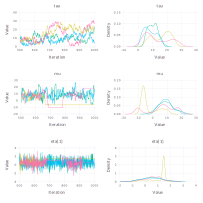

Press ENTER to draw next plot
STDIN> 


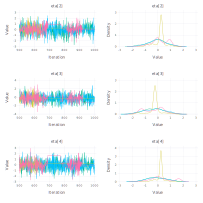

Press ENTER to draw next plot
STDIN> 


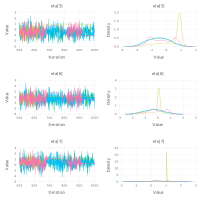

Press ENTER to draw next plot
STDIN> 


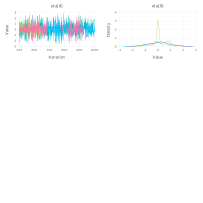

In [7]:
p=plot(sim)
draw(p)